<a href="https://colab.research.google.com/github/HackSlash79/Iris/blob/main/CS4410Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Iris dataset and necessary packages

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Read in Iris Data

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

10 fold cross-validation with k=11 for KNN (n_neighbors parameter)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 11)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print (scores)

[1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [ ]:
print (scores.mean())

0.9666666666666668


Search for optimal value of K for KNN

In [ ]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())
print (k_scores)



[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Plot the value of K for KNN (x axis) verus the cross-validated accuracy (y axis)

Text(0, 0.5, 'Cross-Validated Accuracy')

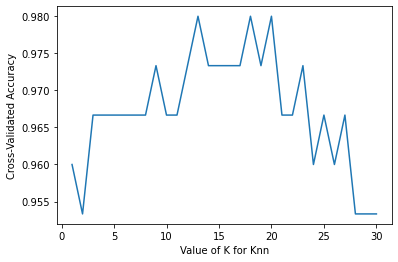

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for Knn')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV

Define parameter values that should be searched

In [ ]:
k_range = range(1, 31)


Create a paramenter grid. Map the parameter names to the values that should be searched

In [ ]:
param_grid = dict(n_neighbors=k_range)
print (param_grid)

{'n_neighbors': range(1, 31)}


Instantiate the grid

In [ ]:
grid = GridSearchCV(knn, param_grid, cv= 10, scoring= 'accuracy')

Fit the grid with data

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

View the results

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00066967, 0.00056345, 0.00055306, 0.00055692, 0.00058377,
        0.00054622, 0.00054696, 0.00055802, 0.00056942, 0.00056009,
        0.00058894, 0.00054259, 0.00067863, 0.00053236, 0.00055521,
        0.00060098, 0.00054474, 0.00073419, 0.00054464, 0.00055776,
        0.00053301, 0.00054579, 0.00058198, 0.00054152, 0.00069273,
        0.00054016, 0.00052283, 0.00054319, 0.00070999, 0.00060215]),
 'std_fit_time': array([2.66050091e-04, 9.94617076e-05, 2.30549780e-05, 6.30626336e-05,
        8.05756920e-05, 3.05032324e-05, 3.86871081e-05, 5.94532235e-05,
        3.47245918e-05, 2.00120551e-05, 5.70297839e-05, 1.34239611e-05,
        1.44107029e-04, 1.54264190e-05, 2.55888898e-05, 1.38693112e-04,
        1.27676655e-05, 3.42732860e-04, 2.00416876e-05, 5.34156807e-05,
        7.67559724e-06, 1.99642784e-05, 9.01603744e-05, 3.87391675e-06,
        2.34804786e-04, 1.55324535e-05, 1.62031519e-05, 1.17175152e-05,
        1.37892512e-04, 9.43648086e-05]),
 'mean_scor

Show optimal parameter, score, and estimator

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)


{'n_neighbors': 13}
0.9800000000000001
KNeighborsClassifier(n_neighbors=13)
